In [ ]:
# NutriClass: Food Classification Using Nutritional Data
# Objective:
# Predict the exact food name using nutritional attributes
# for strict diet planning systems.



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [36]:
df = pd.read_csv("food_dataset.csv")
df.head()


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

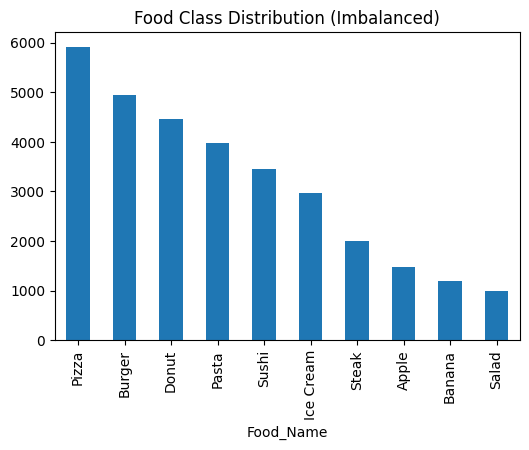

In [61]:
plt.figure(figsize=(6,4))
df['Food_Name'].value_counts().plot(kind='bar')
plt.title("Food Class Distribution (Imbalanced)")
plt.show()

In [62]:
# Dataset size
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Missing values
print(df.isnull().sum())

# Duplicate rows
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Rows: 31387
Columns: 16
Calories              127
Protein               127
Fat                   127
Carbs                 127
Sugar                 127
Fiber                 127
Sodium                127
Cholesterol           127
Glycemic_Index        127
Water_Content         127
Serving_Size          127
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64
Duplicate rows: 0


In [81]:
X = df.drop(columns=['Food_Name'])
import joblib

joblib.dump(X.columns.tolist(), "feature_names.pkl")
print("Feature columns:", X.columns.tolist())
y = df['Food_Name']

# Keep numeric columns only
X = X.select_dtypes(include=["int64", "float64"])


Feature columns: ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free']


In [64]:
X.fillna(X.median(), inplace=True)


In [65]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X_scaled.shape[1])
print("Reduced features:", X_pca.shape[1])

Original features: 11
Reduced features: 6


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_encoded,
    test_size=0.2,
    random_state=42
)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


In [ ]:
trained_models = {}

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
trained_models["Logistic Regression"] = lr_model

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
trained_models["Decision Tree"] = dt_model

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
trained_models["Random Forest"] = rf_model

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
trained_models["KNN"] = knn_model

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
trained_models["SVM"] = svm_model

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
trained_models["Gradient Boosting"] = gb_model

for name, model in trained_models.items():
    evaluate_model(model, X_test, y_test, name)


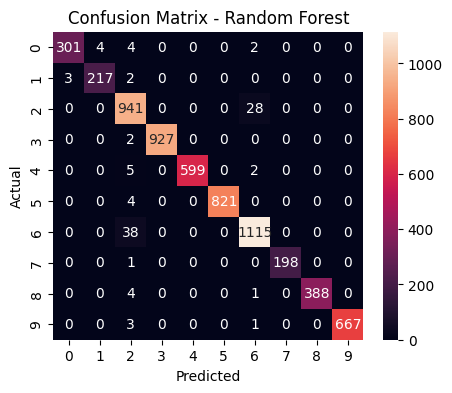

In [70]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [71]:
print("""
NutriClass successfully classifies food items using nutritional data.
Ensemble models like Random Forest and Gradient Boosting perform best.
This system supports strict diet planning with high precision.
""")



NutriClass successfully classifies food items using nutritional data.
Ensemble models like Random Forest and Gradient Boosting perform best.
This system supports strict diet planning with high precision.



In [73]:
def predict_food(user_input):
    """
    Real-time food prediction using full feature alignment
    user_input: dict containing subset of nutritional values
    """

    import pandas as pd

    # Create empty row with ALL feature columns used in training
    input_df = pd.DataFrame(
        [{col: 0 for col in X.columns}]
    )

    # Fill user-provided values
    for key, value in user_input.items():
        if key in input_df.columns:
            input_df[key] = value

    # Apply scaling
    input_scaled = scaler.transform(input_df)

    # Apply PCA if used
    if 'pca' in globals():
        input_processed = pca.transform(input_scaled)
    else:
        input_processed = input_scaled

    # Predict
    pred_encoded = best_model.predict(input_processed)

    # Decode label
    return le.inverse_transform(pred_encoded)[0]


# 🔹 Real-time simulation call
predicted_food = predict_food({
    'Calories': 450,
    'Protein': 35,
    'Carbs': 40,
    'Fat': 12,
    'Sugar': 6
})

print("Predicted Food:", predicted_food)


Predicted Food: Pasta
